<a href="https://www.kaggle.com/code/cr7uwriow/house-predition?scriptVersionId=202797902" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, '/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv'))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zafarali27/house-price-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/house-price-prediction-dataset


In [3]:
df = pd.read_csv("/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
#cleaning the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [5]:
df.describe(include = "all")



,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000,2000,2000,2000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,4,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Downtown,Fair,No,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,558,521,1038,NaN
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,NaN,NaN,NaN,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,NaN,NaN,NaN,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,NaN,NaN,NaN,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,NaN,NaN,NaN,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,NaN,NaN,NaN,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,NaN,NaN,NaN,780086.000000


#  What is the overall distribution of property prices?
  Based on the quartiles (25%, 50%, 75%), the distribution of property prices is likely skewed to the right. This means there are a few very expensive properties that pull the average price higher than the median price.
  
#   How does the average property size (area) compare to the median property size?
 The mean area (2786) is slightly larger than the median area (2833). This again suggests a right-skewed distribution, indicating that there are some larger properties that are pulling the average up.
 

In [6]:
#lets look for missing values
df.isnull().sum()
#we have no missing values in our dataset

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [7]:
#lets look for duplicates
df.duplicated().sum()
#no duplicates

0

# Distribution of our dataset

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


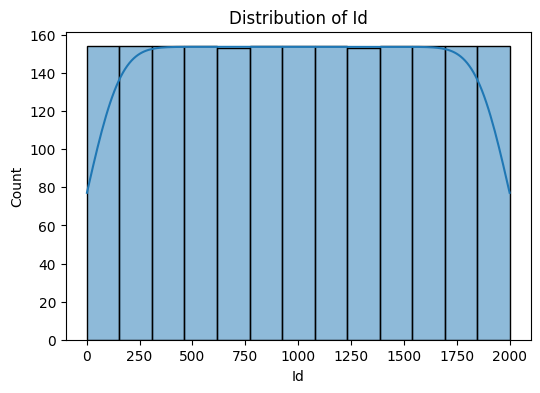

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


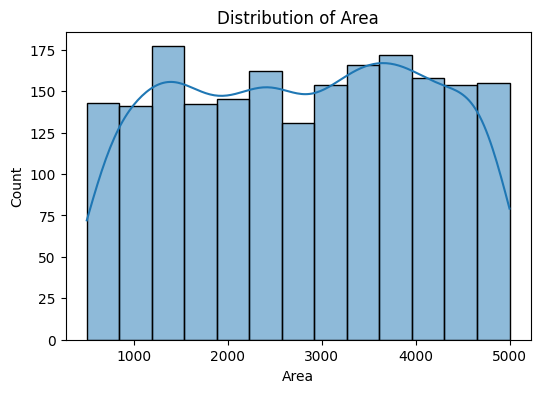

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


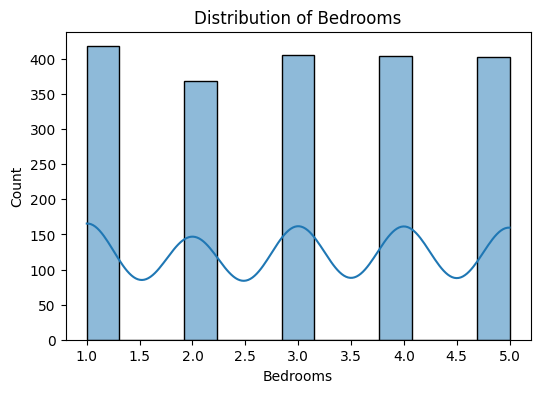

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


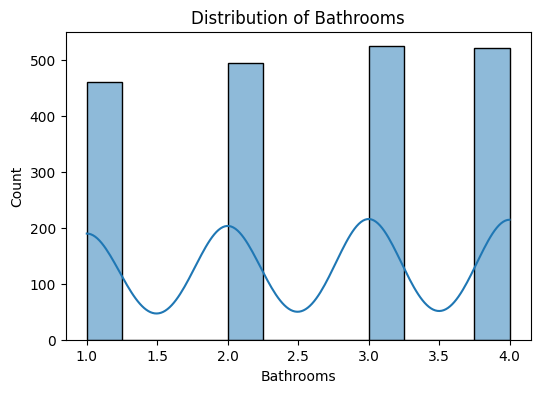

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


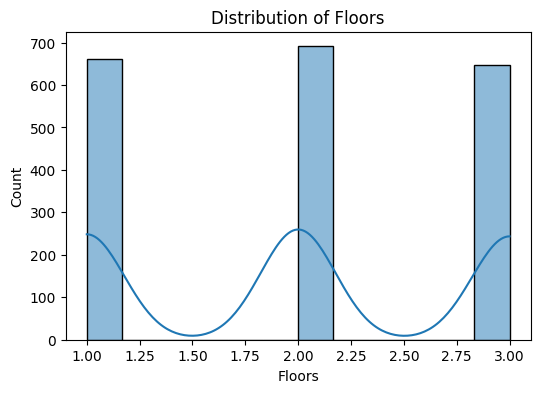

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


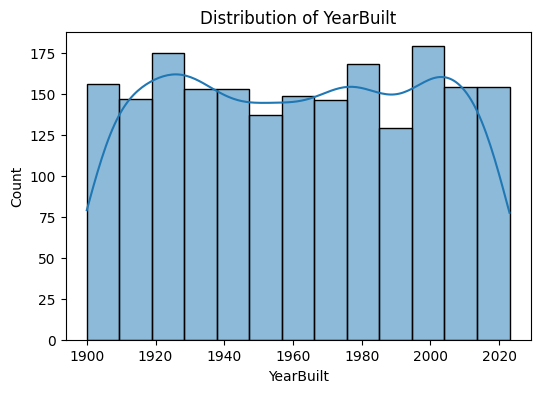

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


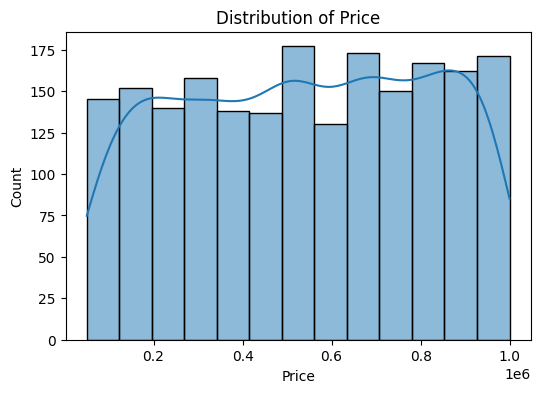

In [9]:

for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], kde=True) 
    plt.title(f'Distribution of {column}')
    plt.show()

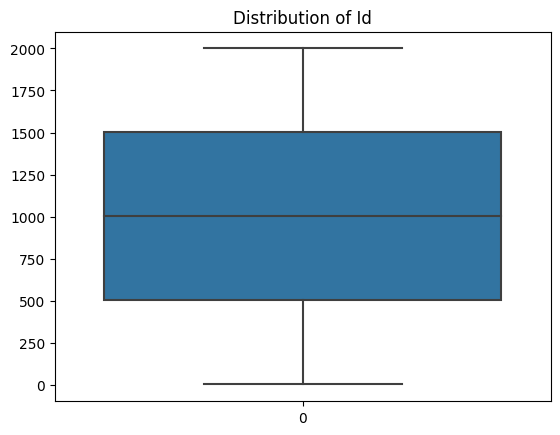

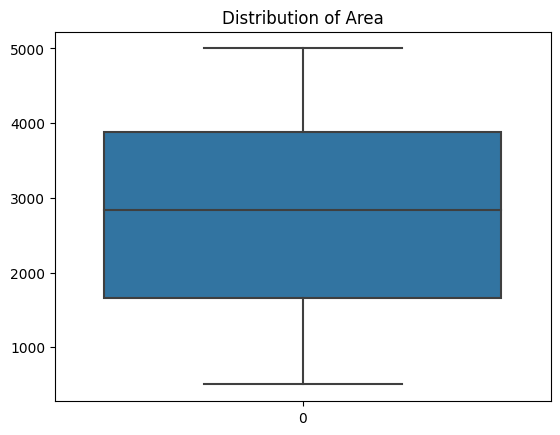

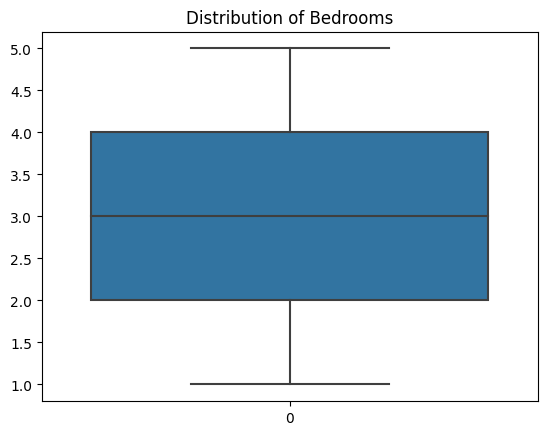

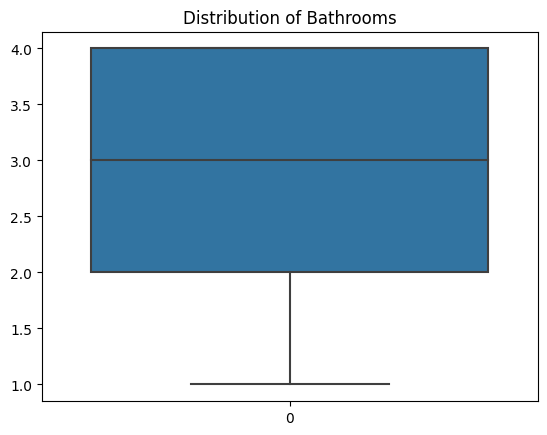

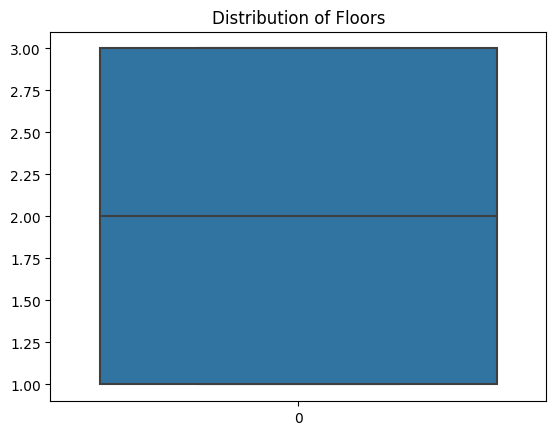

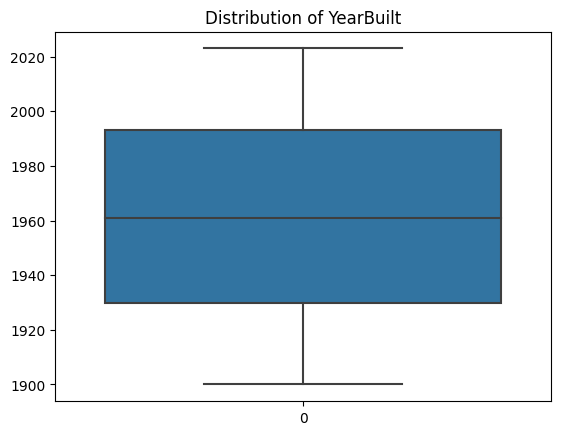

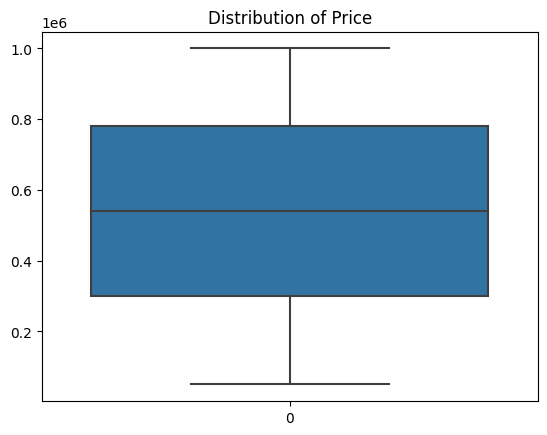

In [10]:
 
for column in df.select_dtypes(include='number').columns:
    sns.boxplot(df[column] )   
    plt.title(f'Distribution of {column}')
    plt.show()

In [11]:
#there is no outliers in our data. but we will nomalize it 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [13]:
#lets encode the categorical columns

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
df['Location'] = encoder.fit_transform(df[['Location']])
df['Condition'] = encoder.fit_transform(df[['Condition']])
df['Garage'] = encoder.fit_transform(df[['Garage']])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         2000 non-null   int64  
 1   Area       2000 non-null   int64  
 2   Bedrooms   2000 non-null   int64  
 3   Bathrooms  2000 non-null   int64  
 4   Floors     2000 non-null   int64  
 5   YearBuilt  2000 non-null   int64  
 6   Location   2000 non-null   float64
 7   Condition  2000 non-null   float64
 8   Garage     2000 non-null   float64
 9   Price      2000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 156.4 KB


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# spliting our data 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

In [15]:
x = df.drop(columns=['Price'])
y = df['Price']
y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42) 


# Training our model

In [17]:
 
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# predicting and exaluating the model


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
 

In [19]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test  , y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Predicted Prices: {y_pred}')
l2_score = mean_squared_error(y_test, y_pred)
print(f'L2 Score (Mean Squared Error): {l2_score}')
print(f'Predicted Prices: {y_pred}')

Mean Squared Error: 132626558046.43051
Predicted Prices: [299794.48185926 327396.10933978 257953.90625704 332823.89859959
 352617.18429069 334100.95820565 335521.7067332  335343.14959723
 333988.0733219  353855.93611098 305092.62694052 362909.70192549
 280215.02821982 295860.14583896 306367.28913286 305165.40117098
 332755.06047808 331077.63056181 338281.63370647 289461.53122195
 324772.46875713 285442.11734165 286770.20996506 356505.35382058
 336698.44820579 309437.25185133 295850.42056807 279129.2210009
 309255.60503969 256265.00608716 271299.57162611 315636.60461653
 327553.2600802  353902.40320534 288399.88636805 277453.95846118
 352384.4736632  349727.5296251  300126.88124712 289625.2895932
 256271.95719528 298562.5591069  298732.20274156 314466.05715189
 304980.27330077 335303.21203755 331020.97161231 294650.68090804
 334191.64815441 300901.92847821 269792.72548364 315612.57631448
 333797.24500958 305051.54583317 305191.29725171 289557.11303369
 333907.74978328 277363.30082816 27

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
